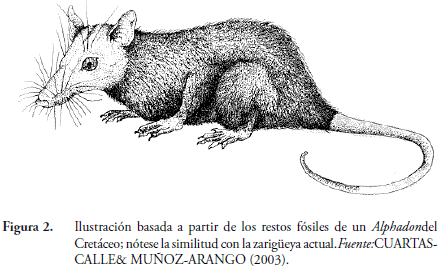

El  objetivo de nuestro trabajo es predecir la edad de una zarigüeya  a partir del tamaño de su cráneo. Segun la revista de  Biología tropical pag 313-320 "crecimiento y desarrollo  del cráneo en marsupiales" Lopez R  (1997) en  mamíferos  como la zarigüeya, el cráneo se desarolla a medida que el animal crece, por ejemplo, si el cráneo es pequeño y menos desarollado podemos asegurar que es una zarigüeya joven, pero si por el contrario el cráneo es más grande y robusto la zarigüeya esta en una etapa adulta. Aunque hay muchas formas de saber la edad de una zarigüeya a partir de sus caracteristicas fisicas, nosotros lo vamos a hacer a partir del tamaño de su cráneo.

El estudio de este problema es importante, pues tiene implicaciones ecológicas y conservativas dado que al saber cuantas zarigüeya jovenes o adultas hay en cierta poblacion ayuda a los ecologistas  a comprender su estructura poblacional, su taza de  reproducción y supervivencia y es muy útil para estrategias de conservación 

Determinar la edad de una zarigüeya es una tarea dificil y solo se puede llegar a conocer a partir de sus caracteristicas físicas y en algunas veces de su comportamiento. Una vez que la zarigüeya ha alcanzado la edad adulta, es casi imposible determinar la edad sin llevarla al veterinario. A menudo, es necesario determinar la edad de una zarigüeya abandonada para medir su probabilidad de supervivencia. 



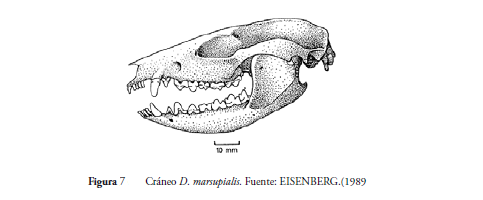


Referencias: Clayton Yuetter articulo  como " como saber la edad de una zarigüeya"

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy import poly


escriba 
```
pip install pandas, seaborn, matplotlib, scikit-learn
```
en la terminal 👍🏽

  NOTA: El Dataset fue sacado de Kaggle, la cual es una plataforma web que permite acceder de manera gratuita  y a una gran cantidad de datos y códigos publicados por la comunidad. Dicha comunidad  en línea   esta conformada por  científicos de datos y profesionales del aprendizaje automático. kaggle permite a los usuarios encontrar y publicar conjuntos de datos, explorar y crear modelos en un entorno de ciencias de datos basados en la web; trabajar con otros científicos de datos e ingenieros  de aprendizaje automático y participar en concursos para resolver desafíos de ciencias de datos. Nótese además que nuestro Dataset, NaN en un dataset de Kaggle significa "No es un numero". Indica valores faltantes o indefinidos en los datos, y suele usarse para representar celdas vacías o errores en el procesamiento numérico. 

## Regresiones

Primero, importamos los datos desde el archivo dataset.csv, tomado de Kaggle. Por comodidad, se ordenan de menor a mayor segun la longitud del craneo 'hdlngth'.

Preparamos tambien los datos que usaremos para las regresiones, 'hdlngth' y 'age'

Mostramos en una grafica de dispersion los datos. Podemos observar que la edad se mide discretizada, con valores enteros entre 0 y 10, por lo que no se pueden esperar regresiones muy precisas al resultar en funciones continuas. 

<Axes: ylabel='age'>

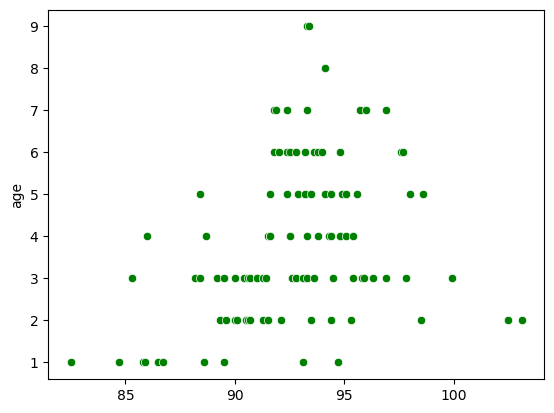

In [56]:
df = pd.read_csv('./dataset.csv')
df.sort_values(by=['hdlngth'],inplace=True, ascending = True)



# Selecciona los valores de la columna 'hdlngth' y 'age'.
x = df['hdlngth'].values.reshape(-1, 1)
y = df['age']

# Elimina filas con valores NaN en 'y' (edad).
mask = ~y.isna()  # Crea una máscara booleana para identificar filas sin valores NaN y filtrar para seleccionar los que si me sirven.
x = x[mask]       # Aplica la máscara a x para eliminar lo que no me sirve.
y = y[mask]       # Aplica la máscara a y para eliminar lo que no me sirve.
n = len(x)

sns.scatterplot(x=x.flatten(), y=y, color="green")


Hacemos una regresion lineal usandi sci-kit, con el método .fit que utiliza minimos cuadrados para hacer la regresion y encontrar los parametros de la función lineal. 

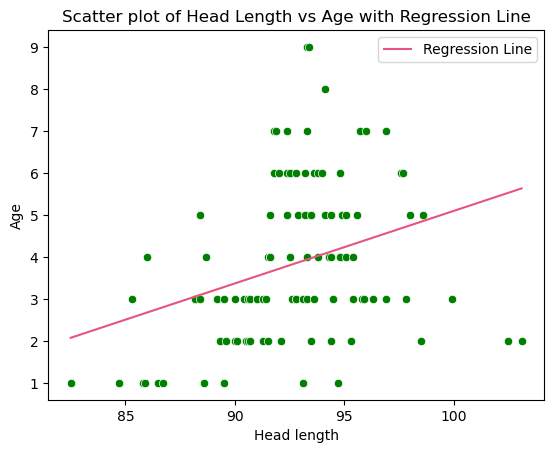

In [57]:


# Ajusta un modelo de regresión lineal.
model = LinearRegression()  # Crea una instancia del modelo de regresión lineal.
model.fit(x, y)  # Ajusta el modelo utilizando los datos x e y.

# Obtiene los valores predichos por el modelo (la línea de regresión).
y_prediccion = model.predict(x)

error_lineal = ((y - y_prediccion) ** 2).mean()*n #error cuadratico 



# Crea un gráfico de dispersión (scatter plot) con los valores de 'x' y 'y'. ( son los puntos verdes)
sns.scatterplot(x=x.flatten(), y=y, color="green")  # Se utiliza flatten() para transformar x en un vector 1D.

# Traza la línea rosada de regresión sobre el gráfico de dispersión.
plt.plot(x, y_prediccion, color='#e75480', label='Regression Line')  # Línea rosada con la etiqueta  llamada (Regression Line)

# Agrega etiquetas a los ejes y un título al gráfico.
plt.xlabel('Head length')  # Etiqueta del eje x (para nuestro caso,"Head length").
plt.ylabel('Age')  # Etiqueta del eje y ( para nuestro caso "Age")
plt.title('Scatter plot of Head Length vs Age with Regression Line')  # Título del gráfico.

# Muestra la parte explicativa en el gráfico.
plt.legend()

#  Nos muestra el gráfico final en pantalla.
plt.show()


Ahora hagamos una regresión cuadrática usando numpy. Planteamos el siguiente sistema sobredeterminado $Ax = b$:
$$ \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots &\vdots \\ 1 & x_n & x_n^2 \end{bmatrix} \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \end{bmatrix} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$$
Y lo resolvemos usando el metodo de mínimos cuadrados de numpy para obtener los parámetros $\hat{x} = [\beta_0,\beta_1,\beta_2]^T$ que hagan que el modelo cuadrático $f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 $ minimice el error cuadrático $ ||b-A\hat{x}|| $. 

In [67]:

A = np.stack([[1,t[0],t[0]**2] for t in x])
b = y

b0,b1,b2 = np.linalg.lstsq(A,b,-1)[0]

error_cuadratico=np.linalg.lstsq(A,b,-1)[1]

def quadfit(x):
    return b0 + b1*x + b2*x**2

print(f'Modelo cuadratico: quad(x) = {b0} + {b1}*x + {b2}*x**2')

Modelo cuadratico: quad(x) = -281.052602921314 + 5.986745904766985*x + -0.031384574422081535*x**2


Por último, intentamos un modelo exponencial. Usamos el siguiente sistema $$ \begin{bmatrix} 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} \begin{bmatrix} \delta_0 \\ \delta_1 \end{bmatrix} = \begin{bmatrix} ln(y_1) \\ \vdots \\ ln(y_n) \end{bmatrix} $$, para obtener el mejor modelo lineal que aproxime a $ln(y)$. Con esto, $ln(y) = \delta_0 + \delta_1 x \iff y = e^{\delta_0} e^{\delta_1 x} $

Modelo exponencial: expo(x) = 0.009777574791179449exp(0.0629034486027119x)
1.2598346485465868 2.09174859344314


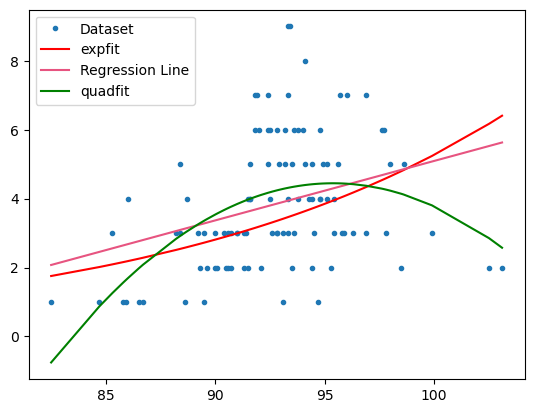

[286.97812648]


In [68]:
#Exponencial


A = np.stack([[1,x] for x in xx])
b = [np.log(y) for y in yy]

d0,d1 = np.linalg.lstsq(A,b,-1)[0]

error_expo=np.linalg.lstsq(A,b,-1)[1]

def expfit(x):
    return np.exp(e0) * np.exp(e1 * x)
print(f'Modelo exponencial: expo(x) = {np.exp(e0)}exp({e1}x)')
print(quadfit(xx[2]),expfit(xx[2]))
plt.plot(xx, yy, 'o', label='Dataset', markersize=3)
plt.plot(xx, expfit(xx),'r', label='expfit' ) 
plt.plot(x, y_prediccion, color='#e75480', label='Regression Line') 
plt.plot(xx,quadfit(xx),'g',label = 'quadfit' )

plt.legend()

plt.show()
print(r)


Tener en cuenta que los datos que me arroja el dataset esta en mm. Se recomienda poner la longitud del craneo alrededor de 74 mm dado que  segun los datos este es el craneo mas pequeño que corresponde al  de una zarigüeya bebe 